In [1]:
# Set the path of the data source folder, and the folder that will save the processed images for training

raw_folder = "../data/voc"
train_folder = "../data/classification/training"

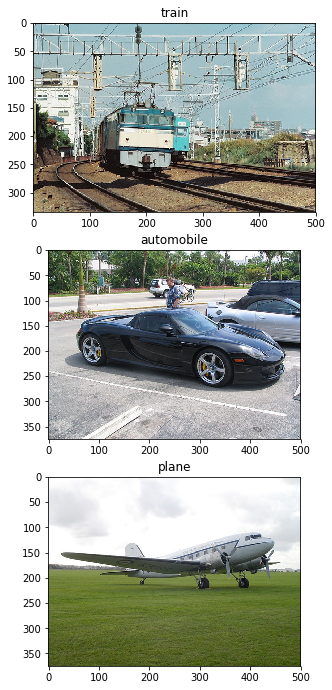

In [2]:
# Explore images

import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Required magic to display matplotlib plots in notebooks
%matplotlib inline

# Set up a figure of an appropriate size
fig = plt.figure(figsize=(12, 16))

# loop through the subfolders
dir_num = 0
for root, folders, filenames in os.walk(src_folder):
    for folder in folders:
        # Load the first image file using the PIL library
        file = os.listdir(os.path.join(root,folder))[0]
        imgFile = os.path.join(root,folder, file)
        img = Image.open(imgFile)
        # Add the image to the figure (which will have 4 rows and enough columns to show a file from each folder)
        a=fig.add_subplot(4,np.ceil(len(folders)/4),dir_num + 1)
        imgplot = plt.imshow(img)
        # Add a caption with the folder name
        a.set_title(folder)
        dir_num = dir_num + 1


In [3]:
# Standardize the images

import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Helper function to resize image
def resize_image(src_image, size=(128,128), bg_color="white"): 
    from PIL import Image, ImageOps 
    
    # resize the image so the longest dimension matches our target size
    src_image.thumbnail(size, Image.ANTIALIAS)
    
    # Create a new square background image
    new_image = Image.new("RGB", size, bg_color)
    
    # Paste the resized image into the center of the square background
    new_image.paste(src_image, (int((size[0] - src_image.size[0]) / 2), int((size[1] - src_image.size[1]) / 2)))
  
    # return the resized image
    return new_image


# Create resized copies of all of the source images
size = (128,128)

# Create the output folder if it doesn't already exist
if os.path.exists(train_folder):
    shutil.rmtree(train_folder)

# Loop through each subfolder in the input folder
for root, folders, files in os.walk(src_folder):
    for sub_folder in folders:
        print('processing folder ' + sub_folder)
        # Create a matching subfolder in the output dir
        saveFolder = os.path.join(train_folder,sub_folder)
        if not os.path.exists(saveFolder):
            os.makedirs(saveFolder)
        # Loop through the files in the subfolder
        file_names = os.listdir(os.path.join(root,sub_folder))
        for file_name in file_names:
            # Open the file
            file_path = os.path.join(root,sub_folder, file_name)
            print("reading " + file_path)
            image = Image.open(file_path)
            # Create a resized version and save it
            resized_image = resize_image(image, size)
            saveAs = os.path.join(saveFolder, file_name)
            print("writing " + saveAs)
            resized_image.save(saveAs)
            

processing folder train
reading ../data/voc/train/003038.jpg
writing ../data/classification/training/train/003038.jpg
reading ../data/voc/train/001483.jpg
writing ../data/classification/training/train/001483.jpg
reading ../data/voc/train/008710.jpg
writing ../data/classification/training/train/008710.jpg
reading ../data/voc/train/006344.jpg
writing ../data/classification/training/train/006344.jpg
reading ../data/voc/train/003564.jpg
writing ../data/classification/training/train/003564.jpg
reading ../data/voc/train/004436.jpg
writing ../data/classification/training/train/004436.jpg
reading ../data/voc/train/001383.jpg
writing ../data/classification/training/train/001383.jpg
reading ../data/voc/train/002906.jpg
writing ../data/classification/training/train/002906.jpg
reading ../data/voc/train/005267.jpg
writing ../data/classification/training/train/005267.jpg
reading ../data/voc/train/004911.jpg
writing ../data/classification/training/train/004911.jpg
reading ../data/voc/train/000946.jpg

writing ../data/classification/training/automobile/000522.jpg
reading ../data/voc/automobile/000461.jpg
writing ../data/classification/training/automobile/000461.jpg
reading ../data/voc/automobile/000672.jpg
writing ../data/classification/training/automobile/000672.jpg
reading ../data/voc/automobile/001290.jpg
writing ../data/classification/training/automobile/001290.jpg
reading ../data/voc/automobile/004961.jpg
writing ../data/classification/training/automobile/004961.jpg
reading ../data/voc/automobile/001360.jpg
writing ../data/classification/training/automobile/001360.jpg
reading ../data/voc/automobile/005749.jpg
writing ../data/classification/training/automobile/005749.jpg
reading ../data/voc/automobile/001693.jpg
writing ../data/classification/training/automobile/001693.jpg
reading ../data/voc/automobile/008105.jpg
writing ../data/classification/training/automobile/008105.jpg
reading ../data/voc/automobile/002917.jpg
writing ../data/classification/training/automobile/002917.jpg
re

reading ../data/voc/plane/007820.jpg
writing ../data/classification/training/plane/007820.jpg
reading ../data/voc/plane/004135.jpg
writing ../data/classification/training/plane/004135.jpg
reading ../data/voc/plane/009905.jpg
writing ../data/classification/training/plane/009905.jpg
reading ../data/voc/plane/003133.jpg
writing ../data/classification/training/plane/003133.jpg
reading ../data/voc/plane/004052.jpg
writing ../data/classification/training/plane/004052.jpg
reading ../data/voc/plane/003667.jpg
writing ../data/classification/training/plane/003667.jpg
reading ../data/voc/plane/007274.jpg
writing ../data/classification/training/plane/007274.jpg
reading ../data/voc/plane/004286.jpg
writing ../data/classification/training/plane/004286.jpg
reading ../data/voc/plane/003554.jpg
writing ../data/classification/training/plane/003554.jpg
reading ../data/voc/plane/008971.jpg
writing ../data/classification/training/plane/008971.jpg
reading ../data/voc/plane/006374.jpg
writing ../data/classif

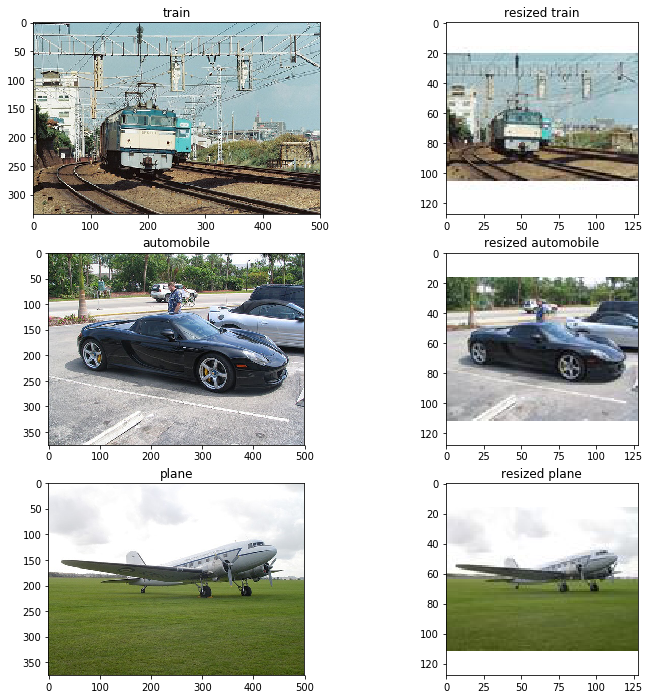

In [4]:
# Compare the original and resized images

# Create a new figure
fig = plt.figure(figsize=(12,12))

# loop through the subfolders in the input directory
image_num = 0
for root, folders, filenames in os.walk(src_folder):
    for folder in folders:
        # Get the first image in the subfolder and add it to a plot that has two columns and row for each folder
        file = os.listdir(os.path.join(root,folder))[0]
        src_file = os.path.join(src_folder,folder, file)
        src_image = Image.open(src_file)
        image_num += 1
        a=fig.add_subplot(len(folders), 2, image_num)
        imgplot = plt.imshow(src_image)
        a.set_title(folder)
        # The next image is the resized counterpart - load and plot it
        resized_file = os.path.join(train_folder,folder, file)
        resized_image = Image.open(resized_file)
        image_num += 1
        b=fig.add_subplot(len(folders), 2, image_num)
        imgplot = plt.imshow(resized_image)
        b.set_title('resized ' + folder)
        